In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy





In [90]:
day=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Bike-Sharing-Dataset/day.csv",parse_dates=["dteday"])
hour=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Bike-Sharing-Dataset/hour.csv",parse_dates=["dteday"])
trips_2011=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/2011-capitalbikeshare-tripdata.csv",parse_dates=["Start date","End date"])
station_loc=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Capital_Bike_Share_Locations_updated2.csv",delimiter=";")

In [91]:
station_loc=station_loc.iloc[:,0:9]

In [92]:
station_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               694 non-null    float64
 1   Y               694 non-null    float64
 2   OBJECTID        690 non-null    float64
 3   LATITUDE        694 non-null    float64
 4   LONGITUDE       694 non-null    float64
 5   NAME            694 non-null    object 
 6   STATION_TYPE    694 non-null    object 
 7   STATION_ID      690 non-null    float64
 8   STATION_STATUS  690 non-null    object 
dtypes: float64(6), object(3)
memory usage: 48.9+ KB


In [93]:
# Bike trips 2012
files_2012=glob.glob("/Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/2012-capitalbikeshare-tripdata/*.csv")
trips_2012=pd.DataFrame()
for file in files_2012:
    data=pd.read_csv(file,parse_dates=["Start date","End date"])
    data["filename"]=file
    trips_2012=pd.concat([trips_2012,data])


In [94]:
trips=trips_2011.append(trips_2012)

/var/folders/bn/ghpvp69d0vd0t7sb_kbnxzqw0000gn/T/ipykernel_69608/2382772095.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips=trips_2011.append(trips_2012)


In [95]:
trips.shape

(3255678, 10)

In [96]:
day.shape

(731, 16)

In [97]:
day.info()
day.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [98]:
hour.shape

(17379, 17)

In [99]:
hour.info()
hour.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [100]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [101]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [102]:
hour.loc[hour["season"]==1,"season"]="Winter"
hour.loc[hour["season"]==2,"season"]="Spring"
hour.loc[hour["season"]==3,"season"]="Summer"
hour.loc[hour["season"]==4,"season"]="Fall"

day.loc[day["season"]==1,"season"]="Winter"
day.loc[day["season"]==2,"season"]="Spring"
day.loc[day["season"]==3,"season"]="Summer"
day.loc[day["season"]==4,"season"]="Fall"


In [103]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 566831
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   filename              object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 273.2+ MB


In [104]:
trips.isna().sum()

Duration                      0
Start date                    0
End date                      0
Start station number          0
Start station                 0
End station number            0
End station                   0
Bike number                   0
Member type                   0
filename                1226767
dtype: int64

In [105]:
trips.isnull().sum()

Duration                      0
Start date                    0
End date                      0
Start station number          0
Start station                 0
End station number            0
End station                   0
Bike number                   0
Member type                   0
filename                1226767
dtype: int64

In [106]:
trips.drop(columns=["filename"],inplace=True)


DATE TIME

In [107]:
pd.to_datetime(hour["dteday"])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [108]:
pd.to_datetime(trips["Start date"])
pd.to_datetime(trips["End date"])

0        2011-01-01 01:00:37
1        2011-01-01 00:08:32
2        2011-01-01 00:15:36
3        2011-01-01 00:16:36
4        2011-01-01 00:32:19
                 ...        
566827   2012-07-01 00:00:52
566828   2012-07-01 00:21:18
566829   2012-07-01 00:06:19
566830   2012-07-01 00:15:21
566831   2012-07-01 00:10:18
Name: End date, Length: 3255678, dtype: datetime64[ns]

In [245]:
trips["mnth"]=pd.DatetimeIndex(trips["Start date"]).month
trips["weekday"]=pd.DatetimeIndex(trips["Start date"]).weekday
trips["dteday"]=pd.DatetimeIndex(trips["Start date"]).date
trips["hour"]=trips["Start date"].dt.hour


In [248]:
# Day time

trips["day_time"]=np.where((trips["hour"]>=0)&(trips["hour"]<5),"Night",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=5)&(trips["hour"]<8),"Early morning",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=8)&(trips["hour"]<12),"Morning",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=12)&(trips["hour"]<17),"Afternoon",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=17)&(trips["hour"]<21),"Evening",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=21)&(trips["hour"]<24),"Night",trips["day_time"])

In [110]:
trips["dteday"]=pd.to_datetime(trips["dteday"])

In [250]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 3255677
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                object        
 12  season                category      
 13  day_name              object        
 14  holiday               int64         
 15  is_holiday            category      
 16  route                 object        
 17  hour                  int64         
 18  day_time              object        
dtype

In [112]:

# HOUR DF
hour["season"]=pd.Categorical(hour["season"],categories=("Winter","Spring","Summer","Fall"))
hour["is_holiday"]=hour["holiday"]
hour.loc[hour["is_holiday"]==1,"is_holiday"]="Yes"
hour.loc[hour["is_holiday"]==0,"is_holiday"]="No"
hour["is_holiday"]=pd.Categorical(hour["is_holiday"],categories=("Yes","No"))

#DAY DF

day["season"]=pd.Categorical(day["season"],categories=("Winter","Spring","Summer","Fall"))
day["is_holiday"]=day["holiday"]
day.loc[day["is_holiday"]==1,"is_holiday"]="Yes"
day.loc[day["is_holiday"]==0,"is_holiday"]="No"
day["is_holiday"]=pd.Categorical(day["is_holiday"],categories=("Yes","No"))


#TRIPS DF

trips["season"]=trips["mnth"]
trips["season"].replace({1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",9:"Fall",10:"Fall",11:"Fall",12:"Winter"},inplace=True)
trips["season"]=pd.Categorical(trips["season"],categories=("Winter","Spring","Summer","Fall"))


In [113]:
# Normalised values to meaningful values

# HOUR DF
hour["tem_cel"]=np.ceil(hour["temp"]*47-8).astype(int)
hour["atemp_cel"]=np.ceil(hour["temp"]*66-16).astype(int)
hour["windspeed_"]=np.ceil(hour["windspeed"]*67).astype(int)

# DAY DF
day["tem_cel"]=np.ceil(day["temp"]*47-8).astype(int)
day["atemp_cel"]=np.ceil(day["temp"]*66-16).astype(int)
day["windspeed_"]=np.ceil(day["windspeed"]*67).astype(int)


In [114]:
#weekday name

hour["day_name"]=hour["weekday"]
hour["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)
trips["day_name"]=trips["weekday"]
trips["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)

In [115]:
# Holiday colummn for "Trips" dataset
holiday_list=day[["dteday","holiday","is_holiday"]]
trips=pd.merge(trips,holiday_list,on="dteday",how="left")

In [116]:
trips.loc[trips["Member type"]=="Member","Member type"]="registered"
trips.loc[trips["Member type"]=="Casual","Member type"]="casual"

In [117]:
trips["route"]=trips["Start station"]+" - "+trips["End station"]

In [118]:
trips.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,mnth,weekday,dteday,season,day_name,holiday,is_holiday,route
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,registered,1,5,2011-01-01,Winter,Fri,0,No,5th & F St NW - 5th & F St NW
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,casual,1,5,2011-01-01,Winter,Fri,0,No,14th & Harvard St NW - 14th & V St NW
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,registered,1,5,2011-01-01,Winter,Fri,0,No,Georgia & New Hampshire Ave NW - Adams Mill & ...
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,registered,1,5,2011-01-01,Winter,Fri,0,No,10th & U St NW - Florida Ave & R St NW
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,casual,1,5,2011-01-01,Winter,Fri,0,No,Adams Mill & Columbia Rd NW - Calvert & Biltmo...


In [119]:
hour.describe()

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tem_cel,atemp_cel,windspeed_
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.872375,17.280166,13.239945
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.033183,12.696745,8.269943
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.000000,-14.000000,0.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,8.000000,7.000000,8.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,16.000000,17.000000,13.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,24.000000,28.000000,17.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,39.000000,50.000000,57.000000


In [120]:
trips.describe()

,Duration,Start station number,End station number,mnth,weekday,holiday
count,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06
mean,1.084497e+03,3.128974e+04,3.129182e+04,6.936537e+00,2.998742e+00,2.382514e-02
std,2.100267e+03,1.931212e+02,1.923761e+02,3.037865e+00,1.974851e+00,1.525041e-01
min,6.000000e+01,3.100000e+04,3.100000e+04,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.990000e+02,3.120000e+04,3.120100e+04,5.000000e+00,1.000000e+00,0.000000e+00
50%,6.580000e+02,3.122600e+04,3.122500e+04,7.000000e+00,3.000000e+00,0.000000e+00
75%,1.092000e+03,3.140100e+04,3.140200e+04,9.000000e+00,5.000000e+00,0.000000e+00
max,8.635500e+04,3.180600e+04,3.180600e+04,1.200000e+01,6.000000e+00,1.000000e+00


In [121]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 3255677
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
 12  season                category      
 13  day_name              object        
 14  holiday               int64         
 15  is_holiday            category      
 16  route                 object        
dtypes: category(2), datetime64[ns](3), int64(6), object(6)
memory usage: 403.6+ MB


EDA (HOUR DF)

In [122]:
# Weather score
hour["hum_score"]=hour["hum"]
hour["temp_score"]=hour["tem_cel"]
hour["wind_score"]=hour["windspeed_"]


hour["hum_score"]=np.where(hour["hum_score"]>=0.78,4,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.63)&(hour["hum_score"]<0.78),3,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.48)&(hour["hum_score"]<0.63),2,hour["hum_score"])
hour["hum_score"]=np.where(hour["hum_score"]<0.48,1,hour["hum_score"])


hour["temp_score"]=np.where((hour["temp_score"]>=0)&(hour["temp_score"]<10),3,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=10)&(hour["temp_score"]<16),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=25)&(hour["temp_score"]<30),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=16)&(hour["temp_score"]<25),1,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]>=30,4,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]<0,4,hour["temp_score"])


hour["wind_score"]=np.where((hour["wind_score"]>=0)&(hour["wind_score"]<13),1,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=13)&(hour["wind_score"]<25),2,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=25)&(hour["wind_score"]<39),3,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=39),4,hour["wind_score"])

hour["weather_score"]=((hour["temp_score"]*0.4)+(hour["hum_score"]*0.3)+(hour["wind_score"]*0.1)+(hour["weathersit"]*0.2))


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

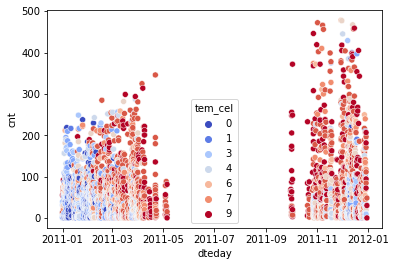

In [123]:
DF_temp_score3=hour.loc[((hour["tem_cel"]>=0) & (hour["tem_cel"]<10))]
sns.scatterplot(data=DF_temp_score3[DF_temp_score3["yr"]==0],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm")

Impact of the weather condition  on the amount of trips

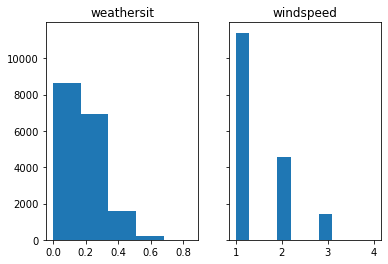

In [124]:

fig,axs=plt.subplots(1,2,sharey=True)
axs[0].set_title("weathersit")
axs[1].set_title("windspeed")

axs[0].hist(hour["windspeed"],bins=5)
axs[1].hist(hour["weathersit"],bins=10)

plt.show()

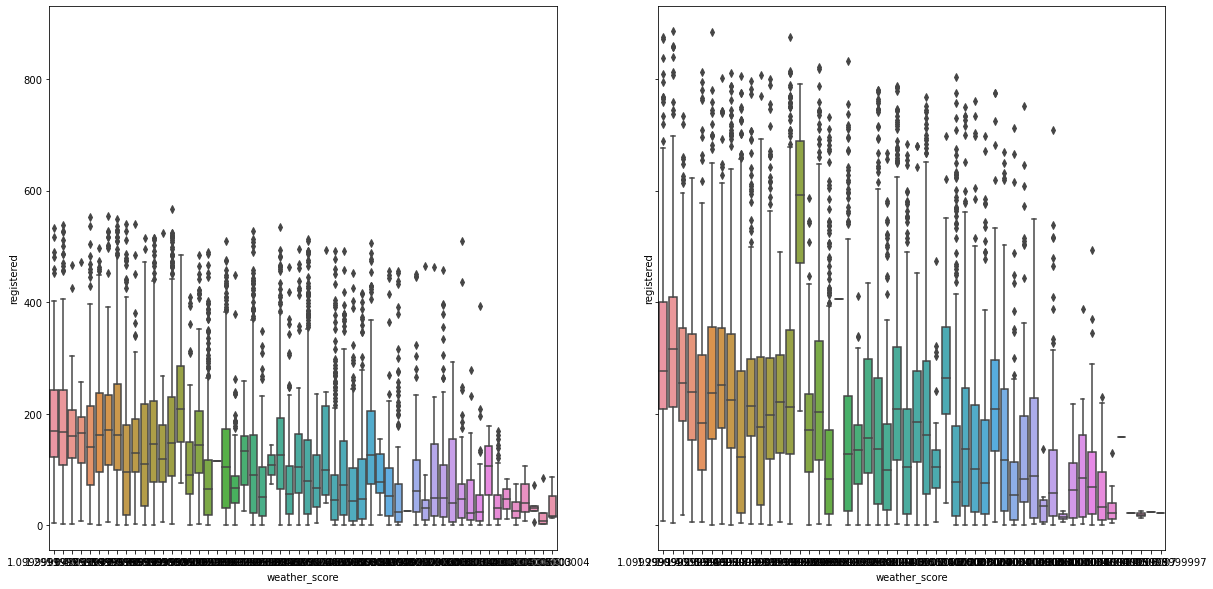

In [125]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)
axs[0].set_xlim(1,4)
axs[0].set_xticks(range(1,4))
axs[1].set_xlim(1,4)
axs[1].set_xticks(range(1,4))
sns.boxplot(data=hour[hour["yr"]==0],y="registered",x="weather_score",ax=axs[0])
sns.boxplot(data=hour[hour["yr"]==1],y="registered",x="weather_score",ax=axs[1])
plt.show()

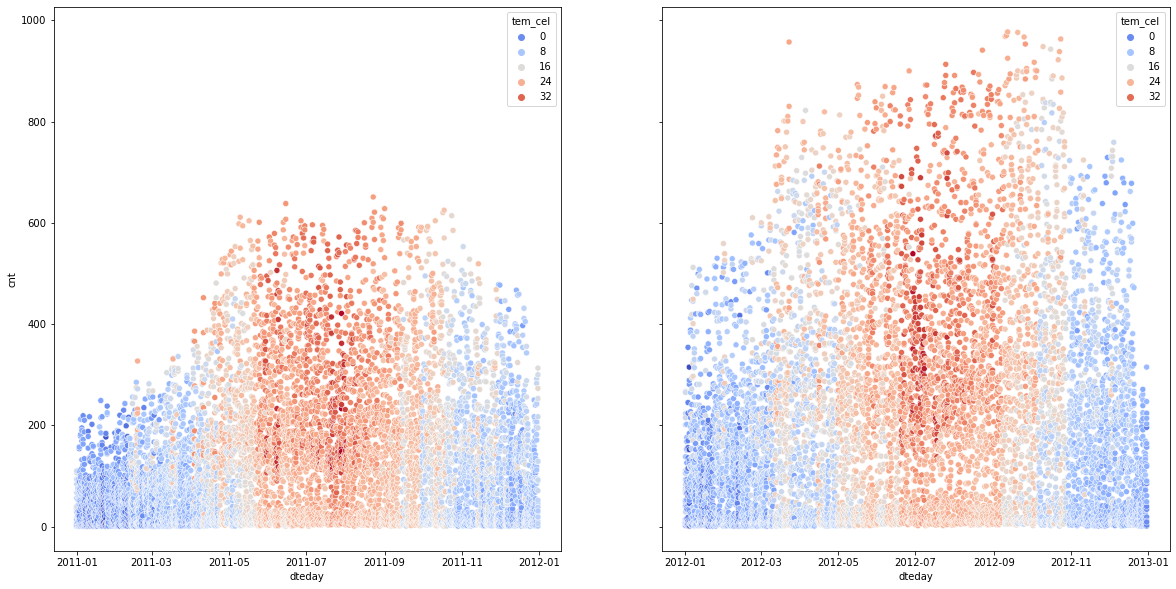

In [126]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

sns.scatterplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm",ax=axs[0])
sns.scatterplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm",ax=axs[1])
plt.show()

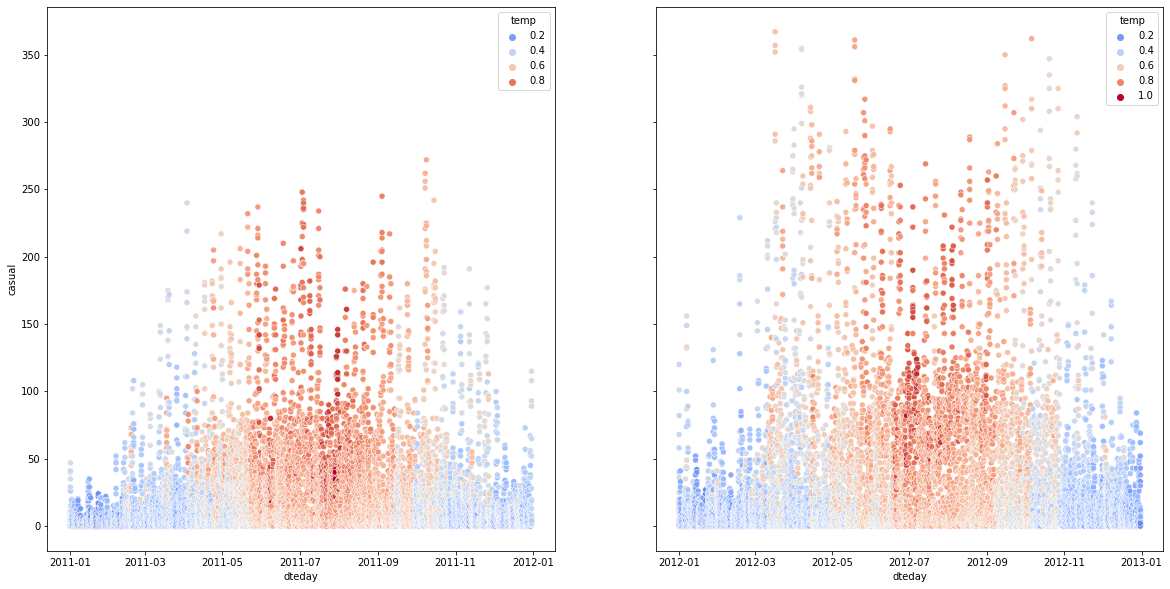

In [127]:
fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

sns.scatterplot(data=hour[hour["yr"]==0],y="casual",x="dteday",hue="temp",palette="coolwarm",ax=axs[0])
sns.scatterplot(data=hour[hour["yr"]==1],y="casual",x="dteday",hue="temp",palette="coolwarm",ax=axs[1])
plt.show()

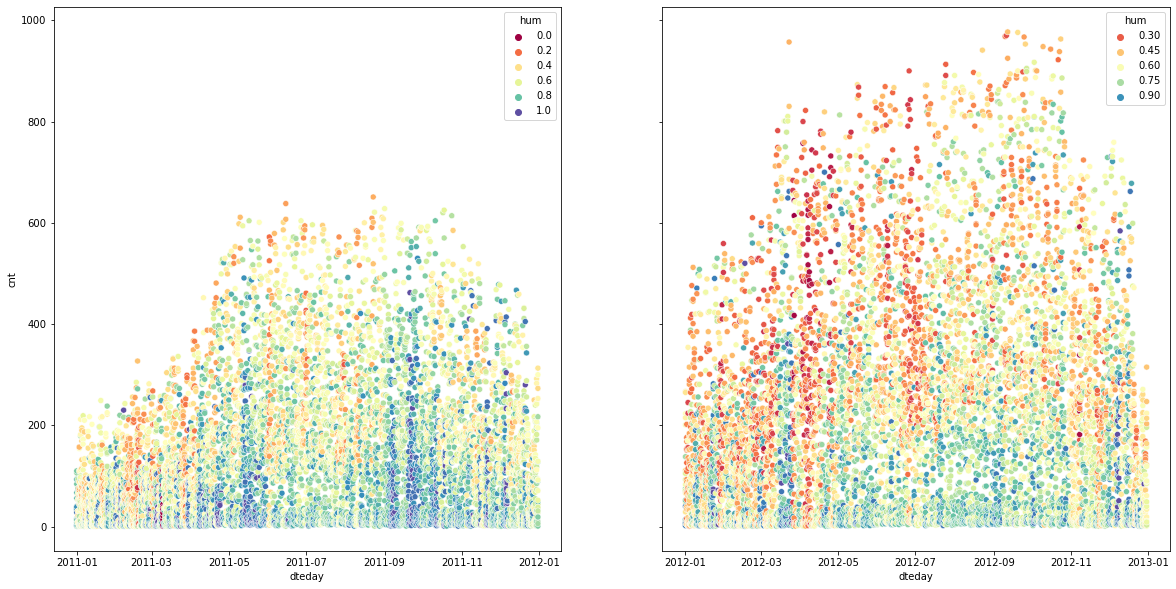

In [128]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)


sns.scatterplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="hum",palette="Spectral",ax=axs[0],hue_order=range(0,1))
sns.scatterplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="hum",palette="Spectral",ax=axs[1],hue_order=range(0,1))
plt.show()

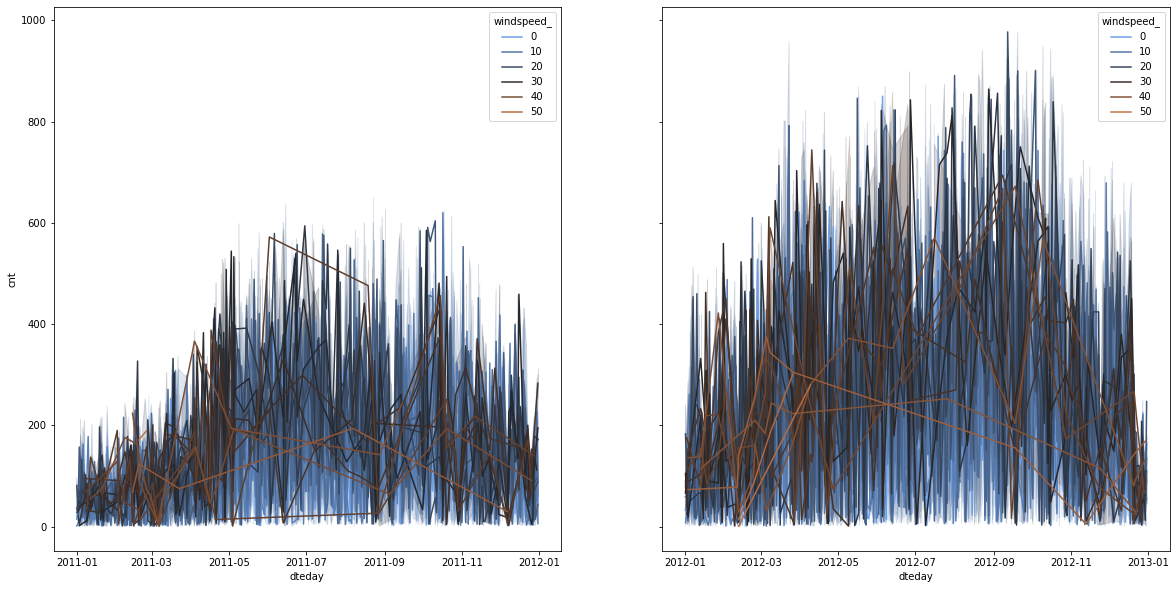

In [129]:
fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

my_palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sns.lineplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="windspeed_",palette=my_palette,ax=axs[0],hue_order=range(0,60))
sns.lineplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="windspeed_",palette=my_palette,ax=axs[1],hue_order=range(0,60))
plt.show()

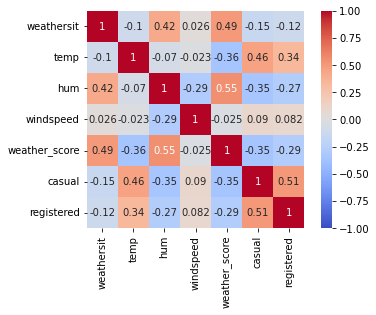

In [130]:

weather=hour[["weathersit","temp","hum","windspeed","weather_score","casual","registered"]].copy()

matrix_weather=weather.corr()

sns.heatmap(data=matrix_weather,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=True,annot=True )
plt.show()

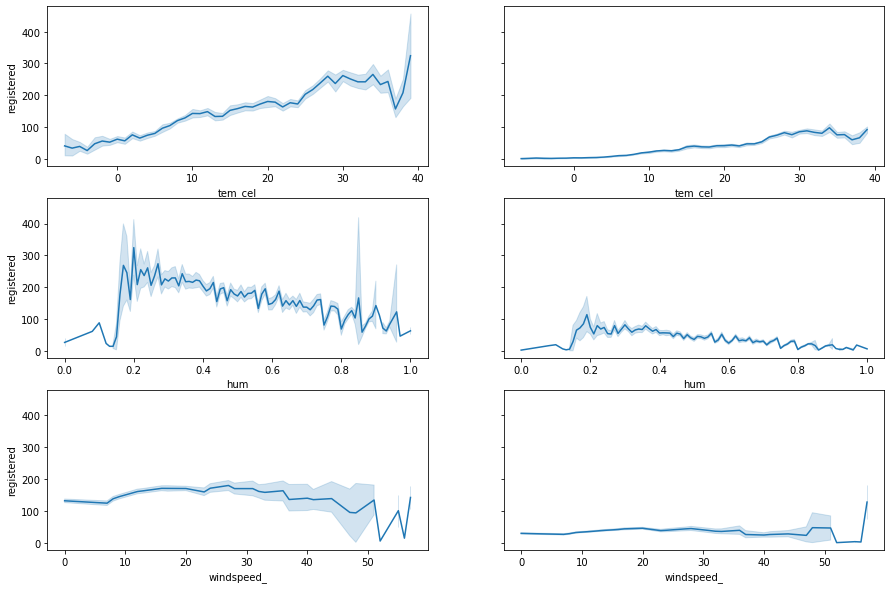

In [131]:
fig,axs=plt.subplots(3,2,figsize=(15,10),sharey=True)
sns.lineplot(data=hour,x="tem_cel",y="registered",palette="coolwarm",ax=axs[0,0],estimator=np.mean)
sns.lineplot(data=hour,x="tem_cel",y="casual",palette="coolwarm",ax=axs[0,1],estimator=np.mean)
sns.lineplot(data=hour,x="hum",y="registered",palette="coolwarm",ax=axs[1,0],estimator=np.mean)
sns.lineplot(data=hour,x="hum",y="casual",palette="coolwarm",ax=axs[1,1],estimator=np.mean)
sns.lineplot(data=hour,x="windspeed_",y="registered",palette="coolwarm",ax=axs[2,0],estimator=np.mean)
sns.lineplot(data=hour,x="windspeed_",y="casual",palette="coolwarm",ax=axs[2,1],estimator=np.mean)

plt.show()

Impact of the month/weekday/hour   on the amount of trips

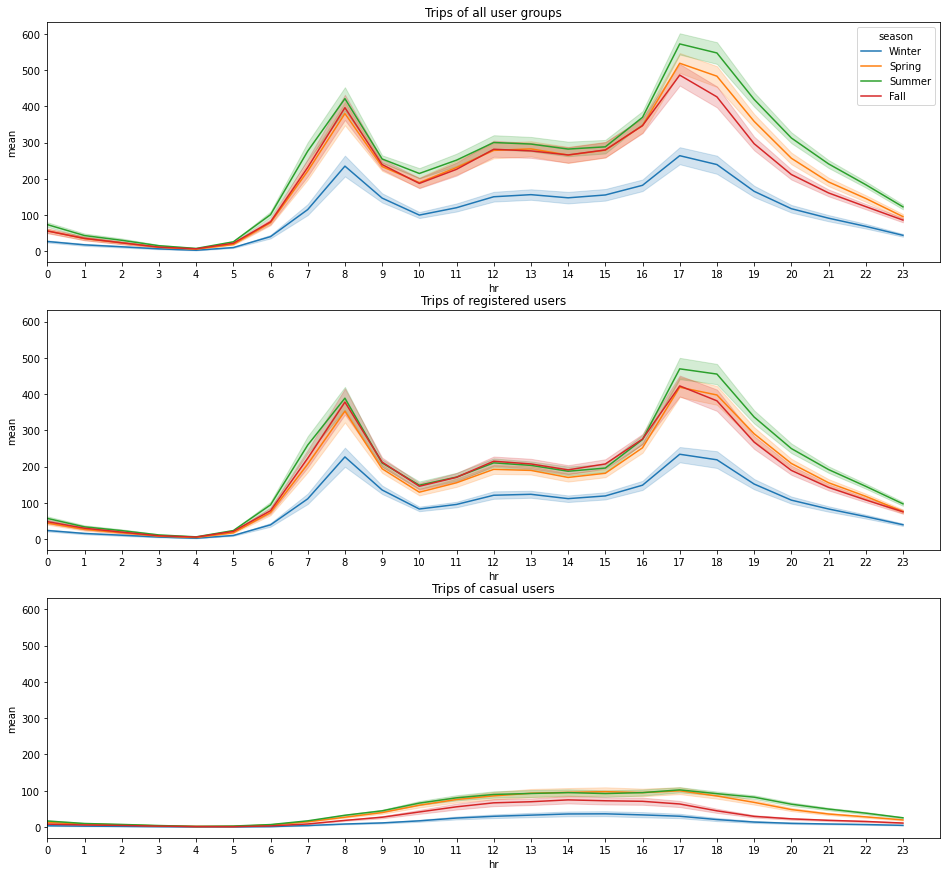

In [132]:
# The most popular hours to rent the bike 
fig,axs=plt.subplots(3,1,figsize=(16,15),sharey=True)
axs[0].set_title("Trips of all user groups")
axs[2].set_title("Trips of casual users")
axs[1].set_title("Trips of registered users")
axs[0].set(xlabel="",ylabel="mean")
axs[2].set(xlabel="",ylabel="mean")
axs[1].set(xlabel="",ylabel="mean")
axs[0].set_xlim(0,24)
axs[0].set_xticks(range(0,24))
axs[1].set_xlim(0,24)
axs[1].set_xticks(range(0,24))
axs[2].set_xlim(0,24)
axs[2].set_xticks(range(0,24))
sns.lineplot(data=hour,x="hr",y="cnt",hue="season",markers=True,estimator=np.mean,ax=axs[0])
sns.lineplot(data=hour,x="hr",y="registered",hue="season",markers=True,estimator=np.mean,ax=axs[1],legend=None)
sns.lineplot(data=hour,x="hr",y="casual",hue="season",markers=True,estimator=np.mean,ax=axs[2],legend=None)


plt.show()

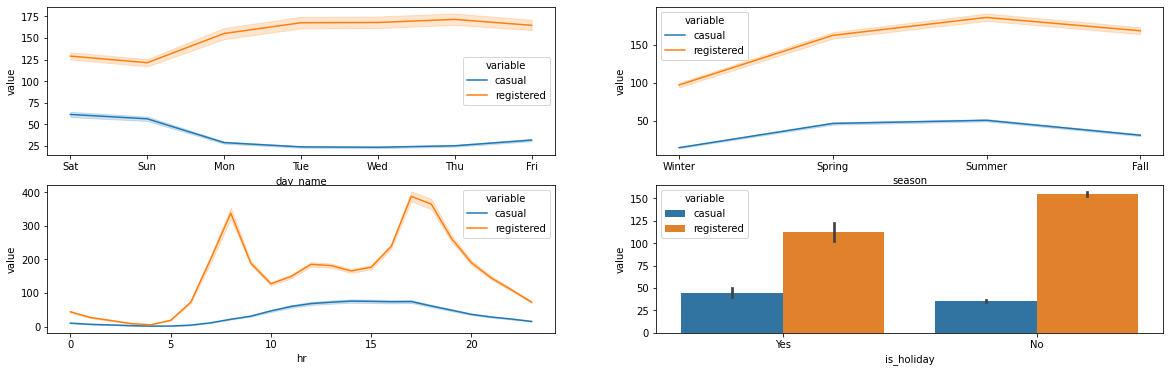

In [133]:
hours_melt=pd.melt(hour,id_vars=["instant","dteday","day_name","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","tem_cel","atemp_cel","hum","windspeed_","is_holiday","weather_score"],value_vars=["casual","registered"])

fig,axs=plt.subplots(2,2,figsize=(20,6))

sns.lineplot(data=hours_melt,x="day_name",y="value",hue="variable",estimator=np.mean,ax=axs[0,0])
sns.lineplot(data=hours_melt,x="season",y="value",hue="variable",estimator=np.mean,ax=axs[0,1])
sns.lineplot(data=hours_melt,x="hr",y="value",hue="variable",estimator=np.mean,ax=axs[1,0])
sns.barplot(data=hours_melt,x="is_holiday",y="value",hue="variable",estimator=np.mean,ax=axs[1,1])
plt.show()


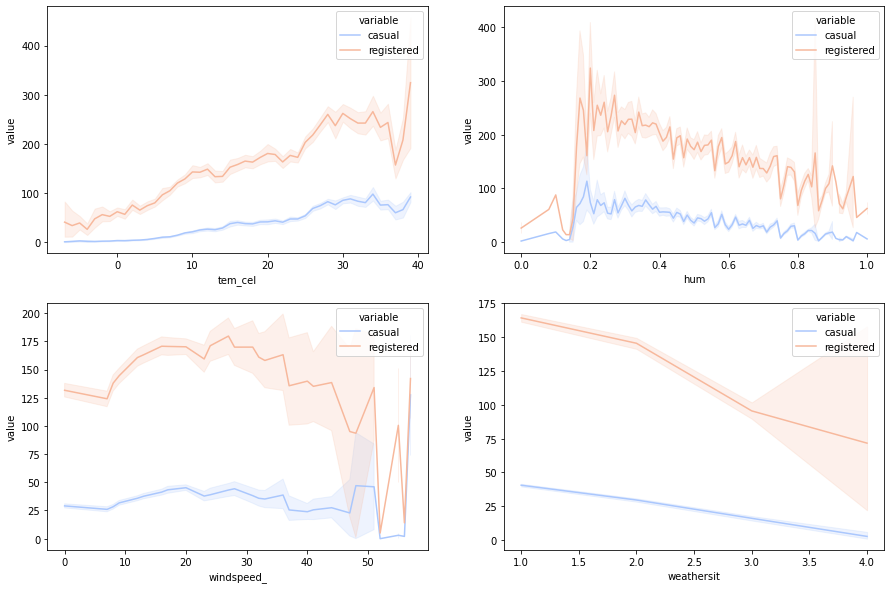

In [134]:
fig,axs=plt.subplots(2,2,figsize=(15,10))
sns.lineplot(data=hours_melt,x="tem_cel",y="value",palette="coolwarm",ax=axs[0,0],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="hum",y="value",palette="coolwarm",ax=axs[0,1],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="windspeed_",y="value",palette="coolwarm",ax=axs[1,0],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="weathersit",y="value",palette="coolwarm",ax=axs[1,1],estimator=np.mean,hue="variable")


plt.show()

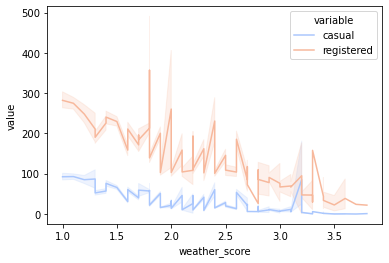

In [135]:
sns.lineplot(data=hours_melt,x="weather_score",y="value",palette="coolwarm",estimator=np.mean,hue="variable")
plt.show()

EDA TRIPS

In [136]:
trips.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,mnth,weekday,dteday,season,day_name,holiday,is_holiday,route
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,registered,1,5,2011-01-01,Winter,Fri,0,No,5th & F St NW - 5th & F St NW
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,casual,1,5,2011-01-01,Winter,Fri,0,No,14th & Harvard St NW - 14th & V St NW
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,registered,1,5,2011-01-01,Winter,Fri,0,No,Georgia & New Hampshire Ave NW - Adams Mill & ...
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,registered,1,5,2011-01-01,Winter,Fri,0,No,10th & U St NW - Florida Ave & R St NW
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,casual,1,5,2011-01-01,Winter,Fri,0,No,Adams Mill & Columbia Rd NW - Calvert & Biltmo...


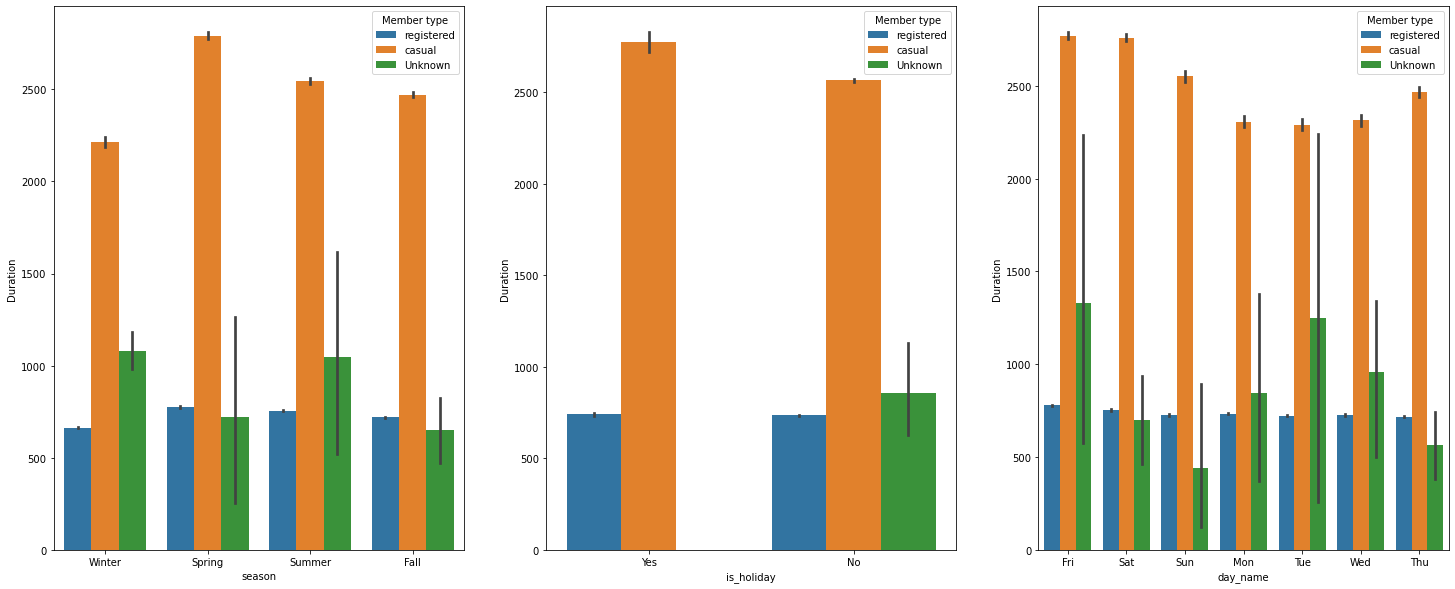

In [137]:
fig,axs=plt.subplots(1,3,figsize=(25,10))
sns.barplot(data=trips,x="season",y="Duration",estimator=np.mean,hue="Member type",ax=axs[0])
sns.barplot(data=trips,x="is_holiday",y="Duration",estimator=np.mean,hue="Member type",ax=axs[1])
sns.barplot(data=trips,x="day_name",y="Duration",estimator=np.mean,hue="Member type",ax=axs[2])
plt.show()

Popular routs & station

Fix misspel

In [181]:
#Fix misspel in Station name
trips.loc[trips["Start station number"]==31619,"Start station"]="Lincoln Park / 13th & East Capitol St NE"

In [182]:
#Fix misspel in Station name
trips.loc[trips["End station number"]==31619,"End station"]="Lincoln Park / 13th & East Capitol St NE"

In [183]:
label=["Route","Count"]
routes_list=trips["route"].value_counts(dropna=False).rename_axis("Route").reset_index(name='Count')

**TOP 50 START STATIONS**

In [184]:
station_start_list=trips["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
station_start_list["Station type"]="Start station"
station_start_loc=pd.merge(station_start_list,station_loc,on="NAME",how="left")

In [185]:
top50_start=station_start_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]


In [252]:
trips.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,mnth,weekday,dteday,season,day_name,holiday,is_holiday,route,hour,day_time
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,registered,1,5,2011-01-01,Winter,Fri,0,No,5th & F St NW - 5th & F St NW,0,Night
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,casual,1,5,2011-01-01,Winter,Fri,0,No,14th & Harvard St NW - 14th & V St NW,0,Night
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,registered,1,5,2011-01-01,Winter,Fri,0,No,Georgia & New Hampshire Ave NW - Adams Mill & ...,0,Night
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,registered,1,5,2011-01-01,Winter,Fri,0,No,10th & U St NW - Florida Ave & R St NW,0,Night
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,casual,1,5,2011-01-01,Winter,Fri,0,No,Adams Mill & Columbia Rd NW - Calvert & Biltmo...,0,Night


In [265]:
#TOP 50 START STATIONS WITH TIME
trips.groupby(["Start station","day_time"]).count()

Duration  Start date  End date  \
Start station                day_time                                        
10th & E St NW               Afternoon          2158        2158      2158   
                             Early morning        87          87        87   
                             Evening            2360        2360      2360   
                             Morning             766         766       766   
                             Night               909         909       909   
...                                              ...         ...       ...   
Wisconsin Ave & Newark St NW Afternoon          4078        4078      4078   
                             Early morning      2044        2044      2044   
                             Evening            3572        3572      3572   
                             Morning            4605        4605      4605   
                             Night              1448        1448      1448   

                                            Start station number  \
Start station                day_time                              
10th & E St NW               Afternoon                      2158   
                             Early morning                    87   
                             Evening                        2360   
                             Morning                         766   
                             Night                           909   
...                                                          ...   
Wisconsin Ave & Newark St NW Afternoon                      4078   
                             Early morning                  2044   
                             Evening                        3572   
                             Morning                        4605   
                             Night                          1448   

                                            End station number  End station  \
Start station                day_time                                         
10th & E St NW               Afternoon                    2158         2158   
                             Early morning                  87           87   
                             Evening                      2360         2360   
                             Morning                       766          766   
                             Night                         909          909   
...                                                        ...          ...   
Wisconsin Ave & Newark St NW Afternoon                    4078         4078   
                             Early morning                2044         2044   
                             Evening                      3572         3572   
                             Morning                      4605         4605   
                             Night                        1448         1448   

                                            Bike number  Member type  mnth  \
Start station                day_time                                        
10th & E St NW               Afternoon             2158         2158  2158   
                             Early morning           87           87    87   
                             Evening               2360         2360  2360   
                             Morning                766          766   766   
                             Night                  909          909   909   
...                                                 ...          ...   ...   
Wisconsin Ave & Newark St NW Afternoon             4078         4078  4078   
                             Early morning         2044         2044  2044   
                             Evening               3572         3572  3572   
                             Morning               4605         4605  4605   
                             Night                 1448         1448  1448   

                                            weekday  dteday  season  day_name  \
Start station       

TOP 50 END STATIONS

In [187]:
station_end_list=trips["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
station_end_list["Station type"]="End station"
station_end_loc=pd.merge(station_end_list,station_loc,on="NAME",how="left")


In [188]:
top50_end=station_end_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

In [189]:
top50_end.head(50)

,NAME,Count,Station type,X,Y,OBJECTID,LATITUDE,LONGITUDE,STATION_TYPE,STATION_ID,STATION_STATUS
0,Massachusetts Ave & Dupont Circle NW,118707,End station,-77.044404,38.910104,68794566.0,38.910100,-77.044400,classic,51.0,active
1,15th & P St NW,83457,End station,-77.034430,38.909810,68794539.0,38.909801,-77.034427,classic,23.0,active
2,Columbus Circle / Union Station,79681,End station,-77.004936,38.896969,68794627.0,38.896960,-77.004930,classic,113.0,active
3,17th & Corcoran St NW,67382,End station,-77.038697,38.912106,68794574.0,38.912100,-77.038700,classic,59.0,active
4,14th & V St NW,59658,End station,-77.032093,38.917774,68794532.0,38.917765,-77.032096,classic,15.0,active
5,New Hampshire Ave & T St NW,57145,End station,-77.038250,38.915556,68794617.0,38.915544,-77.038252,classic,102.0,active
6,8th & H St NW,54811,End station,-77.023093,38.899706,68794607.0,38.899700,-77.023086,classic,92.0,active
7,21st & I St NW,54259,End station,-77.046450,38.900717,68794543.0,38.900711,-77.046449,classic,27.0,active
8,Eastern Market Metro / Pennsylvania Ave & 7th ...,54070,End station,-76.995800,38.884300,NaN,38.884300,-76.995800,classic,NaN,NaN
9,Adams Mill & Columbia Rd NW,52546,End station,-77.042532,38.922861,68794534.0,38.922849,-77.042525,classic,18.0,active


In [146]:
#top50_start.to_csv("/Users/Yanaorfin/Documents/Academy/top50_start.csv",index=False)


TOP STATION LIST

In [190]:
top100_station_list=pd.concat([top50_start,top50_end],ignore_index=True,sort=True)

In [191]:
top100_station_list.head(50)

,Count,LATITUDE,LONGITUDE,NAME,OBJECTID,STATION_ID,STATION_STATUS,STATION_TYPE,Station type,X,Y
0,107162,38.910100,-77.044400,Massachusetts Ave & Dupont Circle NW,68794566.0,51.0,active,classic,Start station,-77.044404,38.910104
1,77750,38.896960,-77.004930,Columbus Circle / Union Station,68794627.0,113.0,active,classic,Start station,-77.004936,38.896969
2,73707,38.909801,-77.034427,15th & P St NW,68794539.0,23.0,active,classic,Start station,-77.034430,38.909810
3,63502,38.912100,-77.038700,17th & Corcoran St NW,68794574.0,59.0,active,classic,Start station,-77.038697,38.912106
4,62378,38.922849,-77.042525,Adams Mill & Columbia Rd NW,68794534.0,18.0,active,classic,Start station,-77.042532,38.922861
5,58356,38.917765,-77.032096,14th & V St NW,68794532.0,15.0,active,classic,Start station,-77.032093,38.917774
6,56029,38.884300,-76.995800,Eastern Market Metro / Pennsylvania Ave & 7th ...,NaN,NaN,NaN,classic,Start station,-76.995800,38.884300
7,55812,38.915544,-77.038252,New Hampshire Ave & T St NW,68794617.0,102.0,active,classic,Start station,-77.038250,38.915556
8,50142,38.908600,-77.032300,14th & Rhode Island Ave NW,68794541.0,25.0,active,classic,Start station,-77.032297,38.908604
9,49812,38.915400,-77.044600,20th St & Florida Ave NW,68794562.0,46.0,active,classic,Start station,-77.044603,38.915410


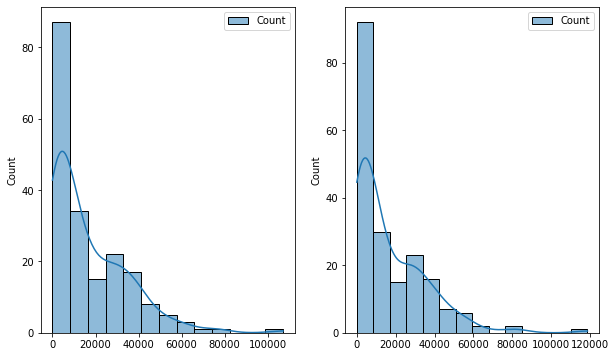

In [150]:
fig,axs=plt.subplots(1,2,figsize=(10,6))
sns.histplot(data=station_start_list,kde=True,ax=axs[0])
sns.histplot(data=station_end_list,kde=True,ax=axs[1])
plt.show()

In [178]:
top100_station_list.to_csv("/Users/Yanaorfin/Documents/Academy/top100_station_list.csv",index=False)

In [194]:
top100_station_list.head(1)

,Count,LATITUDE,LONGITUDE,NAME,OBJECTID,STATION_ID,STATION_STATUS,STATION_TYPE,Station type,X,Y
0,107162,38.9101,-77.0444,Massachusetts Ave & Dupont Circle NW,68794566.0,51.0,active,classic,Start station,-77.044404,38.910104


STATION MAP

In [153]:
map_station=folium.Map(location=[38.9072,-77.0369],zoom_start=13)

In [210]:
top100_station_list.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"]).add_to(map_station),axis=1)

0     <folium.map.Marker object at 0x7faad471d370>
1     <folium.map.Marker object at 0x7faad471d820>
2     <folium.map.Marker object at 0x7faad471dc40>
3     <folium.map.Marker object at 0x7faad471d220>
4     <folium.map.Marker object at 0x7faad4b8b0d0>
                          ...                     
95    <folium.map.Marker object at 0x7faad4bebac0>
96    <folium.map.Marker object at 0x7faad4bebbe0>
97    <folium.map.Marker object at 0x7faad4bebd00>
98    <folium.map.Marker object at 0x7faad4bebe20>
99    <folium.map.Marker object at 0x7faad4bebf40>
Length: 100, dtype: object

In [ ]:
#Custom markers 


POPULAR ROUTES

In [ ]:
popular_routes=routes_list[routes_list['Count']>=126]

In [ ]:
popular_routes.sum()

Route    Eastern Market Metro / Pennsylvania Ave & 7th ...
Count                                              2809042
dtype: object

In [ ]:
routes_list.describe()

,Count
count,22799.000000
mean,142.799158
std,355.602179
min,1.000000
25%,4.000000
50%,27.000000
75%,126.000000
max,10205.000000


In [ ]:
popular_routes.describe()

,Count
count,5701.000000
mean,492.727942
std,582.662924
min,126.000000
25%,195.000000
50%,310.000000
75%,558.000000
max,10205.000000


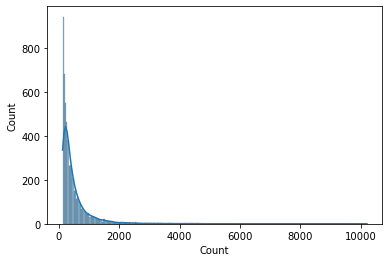

In [ ]:
sns.histplot(data=popular_routes,x="Count",kde=True)
plt.show()

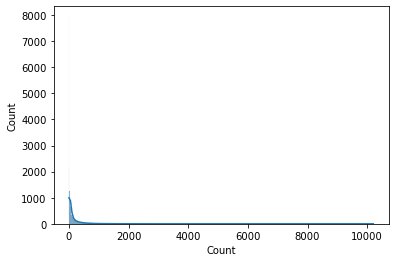

In [ ]:
sns.histplot(data=routes_list,x="Count",kde=True)
plt.show()

In [ ]:
popular_routes.head(30)

,Route,Count
0,Eastern Market Metro / Pennsylvania Ave & 7th ...,10205
1,Adams Mill & Columbia Rd NW - Calvert & Biltmo...,9278
2,Lincoln Park / 13th & East Capitol St NE - Ea...,8770
3,Calvert & Biltmore St NW - Adams Mill & Columb...,8722
4,Massachusetts Ave & Dupont Circle NW - 15th & ...,6713
5,New Hampshire Ave & T St NW - Massachusetts Av...,6386
6,15th & P St NW - Massachusetts Ave & Dupont Ci...,6044
7,13th & D St NE - Columbus Circle / Union Station,5801
8,Massachusetts Ave & Dupont Circle NW - New Ham...,5452
9,Columbus Circle / Union Station - 13th & D St NE,5359


In [ ]:
popular_routes.head(1000).sum()

Route    Eastern Market Metro / Pennsylvania Ave & 7th ...
Count                                              1374736
dtype: object